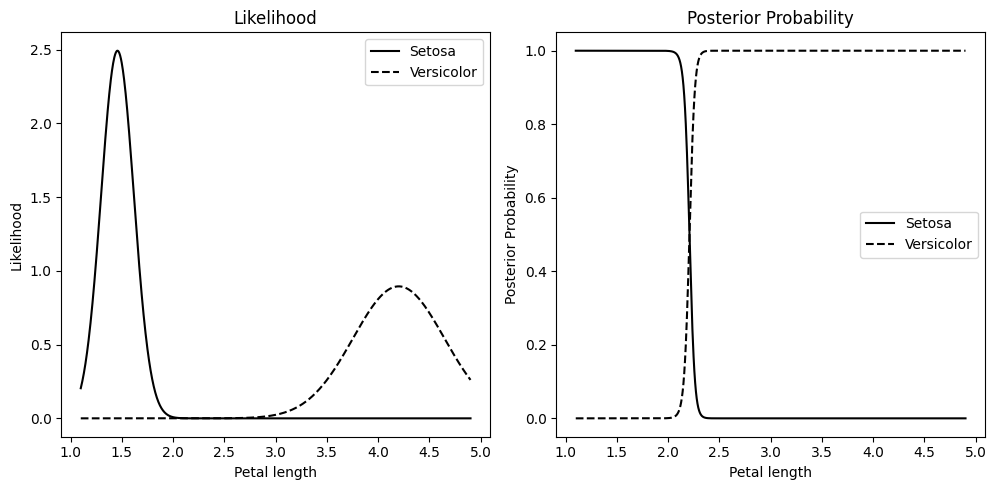

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# โหลดข้อมูล Iris
iris = load_iris()
X = iris.data[:, 2]  # เลือกตัวแปร petal length (ตัวแปรเดียว)
y = iris.target      # คลาส (0: Setosa, 1: Versicolor, 2: Virginica)

# เลือกเฉพาะคลาส 0 และ 1 (Setosa และ Versicolor)
X = X[y != 2]  # ตัดคลาส 2 (Virginica) ออก
y = y[y != 2]  # ตัดคลาส 2 ออก

# แยกข้อมูล train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# แบ่งข้อมูลตามคลาส
X_c1 = X_train[y_train == 0]  # Setosa
X_c2 = X_train[y_train == 1]  # Versicolor

# คำนวณค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานสำหรับแต่ละคลาส
mu_c1, sigma_c1 = np.mean(X_c1), np.std(X_c1)
mu_c2, sigma_c2 = np.mean(X_c2), np.std(X_c2)

# สร้างค่าของตัวแปร x
x = np.linspace(min(X_train), max(X_train), 1000)

# คำนวณ likelihood สำหรับแต่ละคลาส
likelihood_c1 = norm.pdf(x, mu_c1, sigma_c1)
likelihood_c2 = norm.pdf(x, mu_c2, sigma_c2)

# สมมติว่า Prior ของแต่ละคลาสมีค่าเท่ากัน
prior_c1 = prior_c2 = 1/2

# คำนวณ Posterior Probability โดยใช้กฎของเบส์
posterior_c1 = (likelihood_c1 * prior_c1) / (likelihood_c1 * prior_c1 + likelihood_c2 * prior_c2)
posterior_c2 = (likelihood_c2 * prior_c2) / (likelihood_c1 * prior_c1 + likelihood_c2 * prior_c2)

# คำนวณ Decision Boundary (จุดที่ posterior_c1 = posterior_c2)
decision_boundary = x[np.abs(posterior_c1 - posterior_c2).argmin()]

# สร้างกราฟ Likelihood
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x, likelihood_c1, label='Setosa', color='black')
plt.plot(x, likelihood_c2, label='Versicolor', color='black', linestyle='dashed')
plt.title('Likelihood')
plt.xlabel('Petal length')
plt.ylabel('Likelihood')
plt.legend()

# สร้างกราฟ Posterior Probability
plt.subplot(1, 3, 2)
plt.plot(x, posterior_c1, label='Setosa', color='black')
plt.plot(x, posterior_c2, label='Versicolor', color='black', linestyle='dashed')
plt.title('Posterior Probability')
plt.xlabel('Petal length')
plt.ylabel('Posterior Probability')
plt.legend()


plt.tight_layout()
plt.show()


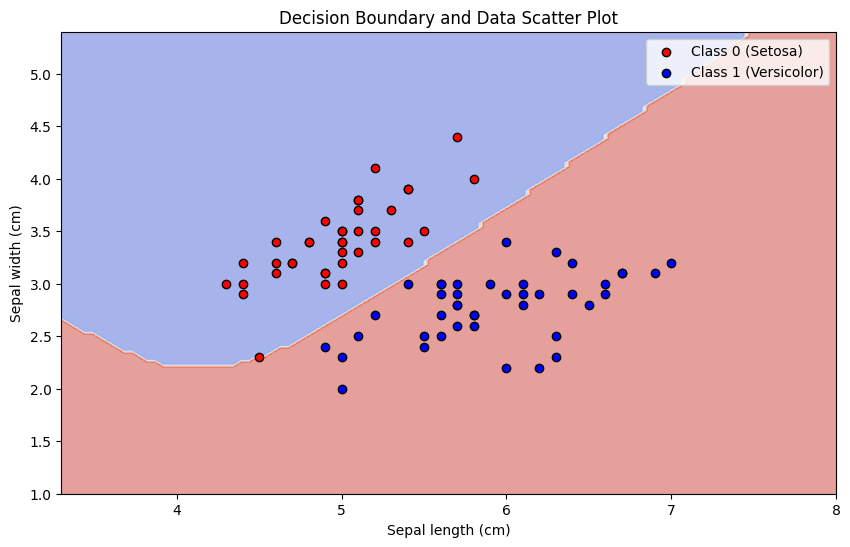

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# โหลดข้อมูล Iris
iris = load_iris()
X = iris.data[:, :2]  # เลือก Sepal length และ Sepal width
y = iris.target       # คลาส (0: Setosa, 1: Versicolor, 2: Virginica)

# เลือกเฉพาะคลาส 0 และ 1 (Setosa และ Versicolor)
X = X[y != 2]
y = y[y != 2]

# แยกข้อมูล train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# สร้าง meshgrid สำหรับการคำนวณ decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# คำนวณค่า decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# สร้างกราฟ
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')  # แสดง Decision Boundary

# แสดงข้อมูล training
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 0 (Setosa)', edgecolor='k')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 1 (Versicolor)', edgecolor='k')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Decision Boundary and Data Scatter Plot')
plt.legend()
plt.show()